In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import numpy.random as rnd
import seaborn as sns
sns.set()
%matplotlib inline

# Task 1

$$\text{Clustering coefficient} = \frac{\langle k \rangle}{n} = p $$
Generate $100$ Random Graphs with $n = 1000$ and $p = 0.002$ (for saving computational time) and plot the box-plot of your computations

Функция для генерации графа

In [2]:
def generate_graph(n, p):
    G=nx.Graph()
    G.add_nodes_from(range(0, n))
    for i in range(0, n):
        for j in range(i+1, n):
            if rnd.random() <= p:
                G.add_edge(i, j)
    return G

Функция для генерации множества графов

In [3]:
def generate_k_graph(k, n, p):
    gs = []
    for i in range(k):
        gs.append(generate_graph(n, p))
    return gs

Генерим графы с заданными условиями:

In [4]:
n = 1000
p = 0.002
gs = generate_k_graph(100, n, p)

Посчитаем для них коэффициенты кластеризации:

In [5]:
cluster_coefs = []
for G in gs:
    cluster_coefs.append(G.number_of_edges() / (n * (n-1) / 2))

Построим график:

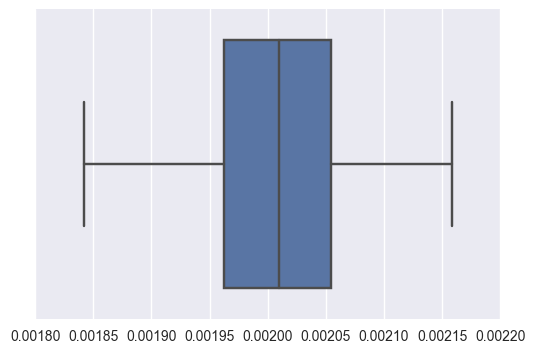

In [6]:
sns.boxplot(cluster_coefs)

Действительно, среднее значение находится примерно на значении $p=0.002$

# Task 2

In this task you are asked to calculate the average size of small components (small component = not a giant one) with regard to average degree of the network. To see the effect clearly, plot average size around $\langle k \rangle = 1$.

На самом деле задание было (как оказалось) о другом - надо перебирать $n\cdot p$ и для каждого значения генерить графы, для которых смотреть средний размер не самых больших компонент.
Для этой цели фиксируем $n$, перебираем $p$ от 0.0001 до 0.0015 (чтобы $n \cdot p$ получилось в районе 1), смотрим значения.

In [7]:
n = 1000
p = 0.0001
k = 50
values = []
steps = 15
iter_num = 0
for p2 in np.linspace(0.0001, 0.0015, steps):
    iter_num += 1
    print(iter_num, "ITERATION FROM", steps)
    cur_gs = generate_k_graph(k, n, p2)
    graphs_comp_lens = []
    for G in cur_gs:
        comp_lens = [len(x) for x in sorted(list(nx.connected_components(G)), key=len)[:-1]]
        graphs_comp_lens.append(np.mean(comp_lens))
    values.append(np.mean(graphs_comp_lens))

1 ITERATION FROM 15
2 ITERATION FROM 15
3 ITERATION FROM 15
4 ITERATION FROM 15
5 ITERATION FROM 15
6 ITERATION FROM 15
7 ITERATION FROM 15
8 ITERATION FROM 15
9 ITERATION FROM 15
10 ITERATION FROM 15
11 ITERATION FROM 15
12 ITERATION FROM 15
13 ITERATION FROM 15
14 ITERATION FROM 15
15 ITERATION FROM 15


Построим график

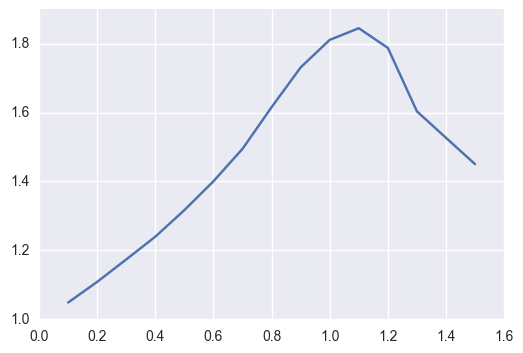

In [8]:
plt.plot(np.linspace(0.0001, 0.0015, steps)*n, values)

Заметим, что максимум достигается в районе единички. Почему это так? Скорее всего это связано с тем, что пока $n\cdot p <1$ с увеличением $n\cdot p$ самая большая компонента связности еще не "поглотила" достаточное количество вершин. Однако после критического значения она поглощает вершины, которые потенциально могли бы быть связаны друг с другом, образуя компоненты связности большие единицы.

# Task 3

Plot the average path length and transitivity coefficents with $n=1000$ and p=0.001 while increasing by 0.003

In [11]:
n = 1000
p = 0.001
k = 10
shortest_path_values = []
transitivity_values = []
steps = int(0.999/0.003 + 1)
iter_num = 0
for p2 in np.linspace(0.001, 1, steps):
    cur_gs = generate_k_graph(k, n, p2)
    graphs_shortest_path = []
    graphs_transitivity = []
    for G in cur_gs:
        G_comp = G.subgraph(max(nx.connected_component_subgraphs(G), key=len))
        graphs_shortest_path.append(nx.average_shortest_path_length(G_comp))
        graphs_transitivity.append(nx.transitivity(G_comp))
    new_shortest_path = np.mean(graphs_shortest_path)
    new_transitivity = np.mean(graphs_transitivity)
    if len(transitivity_values) > 3:
        if np.absolute(new_shortest_path - shortest_path_values[-1]) < 0.1 and np.absolute(new_transitivity - transitivity_values[-1] < 0.001):
            break
    iter_num += 1
    print(iter_num, "ITERATION FROM", steps, ", cur shortest path is: ", new_shortest_path, "cur transitivity is: ", new_transitivity)
    shortest_path_values.append(new_shortest_path)
    transitivity_values.append(new_transitivity)

1 ITERATION FROM 334 , cur shortest path is:  8.96056449644 cur transitivity is:  0.0020979020979
2 ITERATION FROM 334 , cur shortest path is:  5.1348224504 cur transitivity is:  0.00328588032846
3 ITERATION FROM 334 , cur shortest path is:  3.7615321788 cur transitivity is:  0.00717142369989
4 ITERATION FROM 334 , cur shortest path is:  3.260197998 cur transitivity is:  0.0100427003725
5 ITERATION FROM 334 , cur shortest path is:  2.95706146146 cur transitivity is:  0.0128605382618
6 ITERATION FROM 334 , cur shortest path is:  2.77815255255 cur transitivity is:  0.015838853651
7 ITERATION FROM 334 , cur shortest path is:  2.67427327327 cur transitivity is:  0.0189766021949
8 ITERATION FROM 334 , cur shortest path is:  2.58233073073 cur transitivity is:  0.0221588731629
9 ITERATION FROM 334 , cur shortest path is:  2.49957737738 cur transitivity is:  0.0250705724176
10 ITERATION FROM 334 , cur shortest path is:  2.41806646647 cur transitivity is:  0.0279935913608
11 ITERATION FROM 334 

KeyboardInterrupt: 

Поскольку в этот момент стало очевидно, что работу скоро будет необходимо сдать, а полностью все не досчиталось, было сделано волевое решение посмотреть на зависимости по имеющимся на этот момент данным.

Наименьший путь:

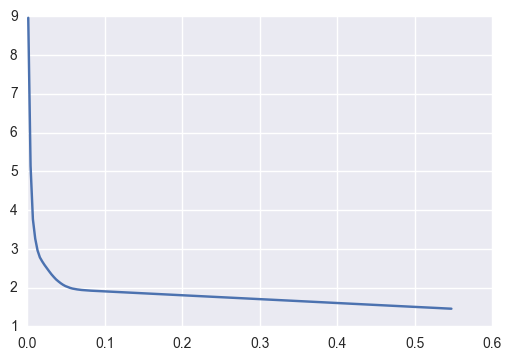

In [12]:
plt.plot(np.linspace(0.001, p2-0.003, len(shortest_path_values)), shortest_path_values)

Можно заметить, что после резкого спуска приближаясь по вероятности к единице, график медленно, но верно, стремится к 1

Транзитивность

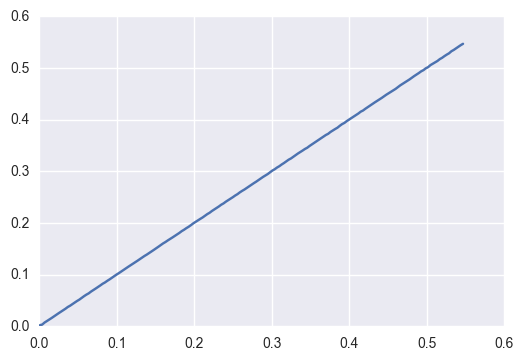

In [13]:
plt.plot(np.linspace(0.001, p2-0.003, len(transitivity_values)), transitivity_values)

Ну а здесь на лицо линейная зависимость коэффициента транзитивности от вероятности

В принципе, даже на неполных данных все взаимосвязи можно видеть